## Importing Libraries

In [2]:
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from sklearn.model_selection import train_test_split
import torch
from tqdm import tqdm

## Loading dataset

In [3]:
# Lets load the dataset (there are two, the difference between them is that one has an additonal column where the hour is put in a column by itself)
# we will work with the one not separated and separate it manually and add other parts for the time

data = pd.read_csv("/kaggle/input/ts-temp-1/MLTempDataset1.csv")

data.head()

,Unnamed: 0,Datetime,Hourly_Temp
0,0,2022-01-04 00:00:00,20.867
1,1,2022-01-04 01:00:00,21.000
2,2,2022-01-04 02:00:00,20.867
3,3,2022-01-04 03:00:00,20.650
4,4,2022-01-04 04:00:00,20.400


## Giving a look at dataset

In [4]:
# Let's check the datatype and other thinks like the size and null values
print(data.info())

print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7056 entries, 0 to 7055
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   7056 non-null   int64  
 1   Datetime     7056 non-null   object 
 2   Hourly_Temp  7056 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 165.5+ KB
None
(7056, 3)


In [6]:
# We see that Datetime is an object we want to to convert it to datetime first and then we can extract the hour, day, month seperately

data['Datetime'] = pd.to_datetime(data['Datetime'])


data['Hour'] = data['Datetime'].dt.hour
data['Day_of_week']  = data['Datetime'].dt.weekday
data['Month'] = data['Datetime'].dt.month
data['Day_of_year'] = data['Datetime'].dt.dayofyear



data.head()


,Unnamed: 0,Datetime,Hourly_Temp,Hour,Day_of_week,Month,Day_of_year
0,0,2022-01-04 00:00:00,20.867,0,1,1,4
1,1,2022-01-04 01:00:00,21.000,1,1,1,4
2,2,2022-01-04 02:00:00,20.867,2,1,1,4
3,3,2022-01-04 03:00:00,20.650,3,1,1,4
4,4,2022-01-04 04:00:00,20.400,4,1,1,4


In [7]:
# lets also drop the unnamed column as it is useless
data = data.drop(columns=['Unnamed: 0'])

data.head()

,Datetime,Hourly_Temp,Hour,Day_of_week,Month,Day_of_year
0,2022-01-04 00:00:00,20.867,0,1,1,4
1,2022-01-04 01:00:00,21.000,1,1,1,4
2,2022-01-04 02:00:00,20.867,2,1,1,4
3,2022-01-04 03:00:00,20.650,3,1,1,4
4,2022-01-04 04:00:00,20.400,4,1,1,4


## Various visualizations of the mean temperature pe hour, day, week and month

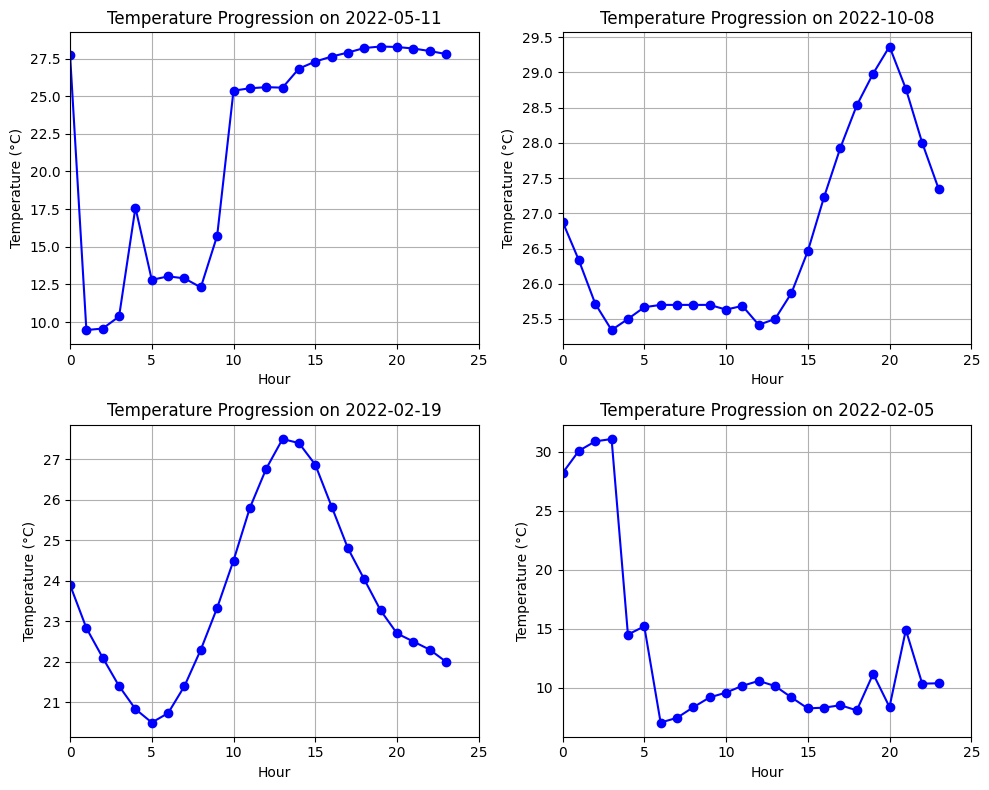

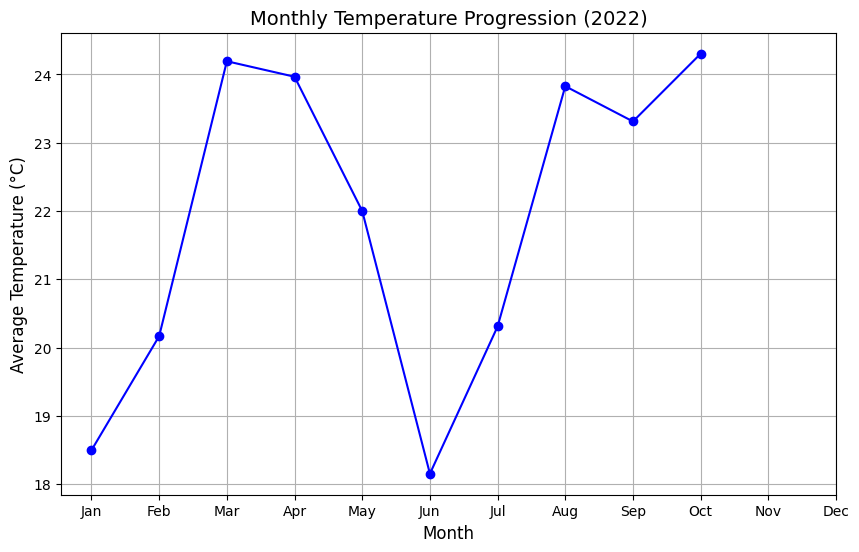

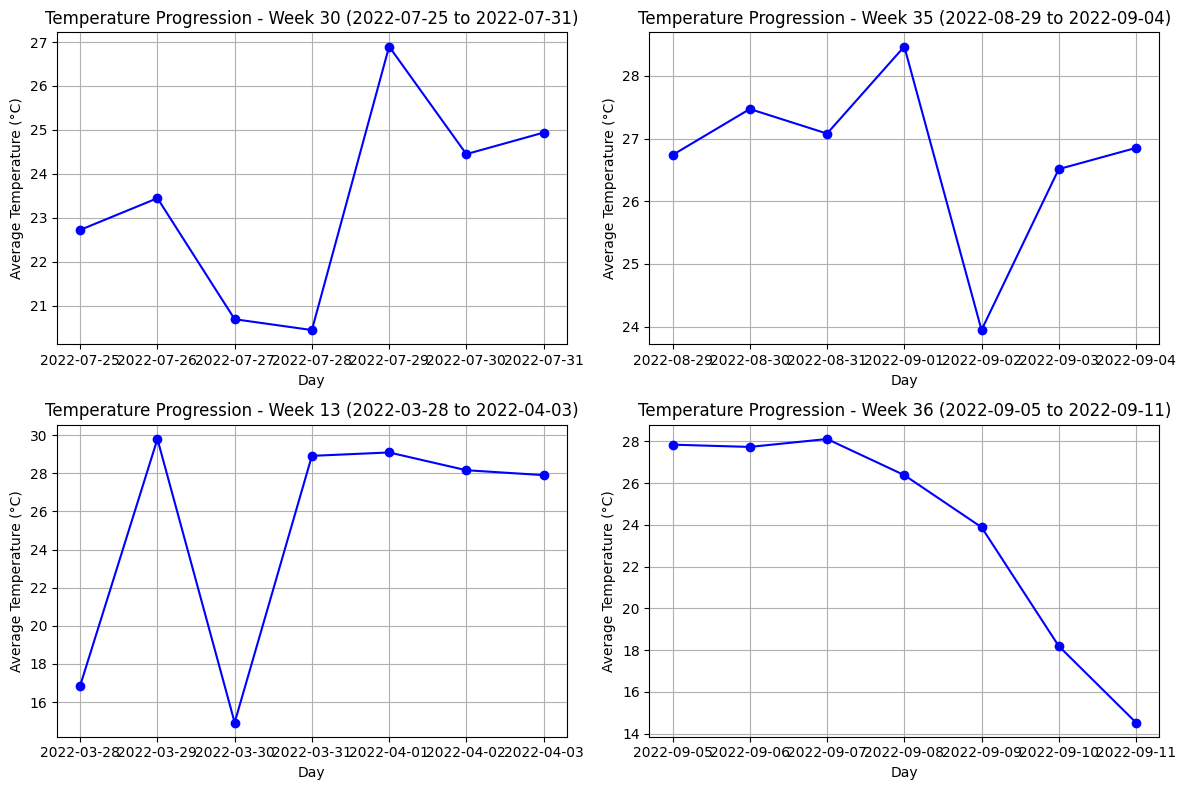

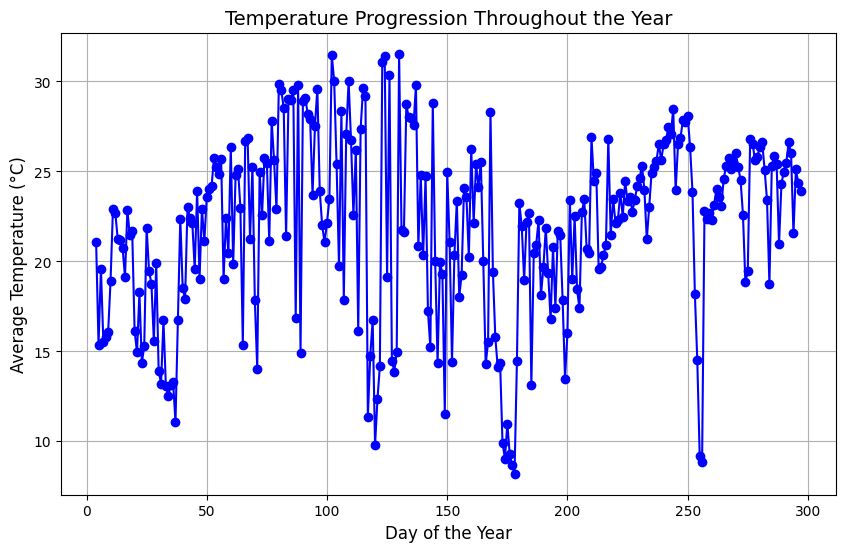

In [9]:
# Let's do some visulaization of the progression of temperature in a day

random_days = np.random.choice(data['Datetime'].dt.date.unique(), 4, replace=False) # we select 4 random days


fig, axs = plt.subplots(2, 2, figsize=(10, 8))


for i, ax in enumerate(axs.flatten()):
    day = random_days[i]
    day_data = data[data['Datetime'].dt.date == day]
    
    ax.plot(day_data['Datetime'].dt.hour, day_data['Hourly_Temp'], marker='o', linestyle='-', color='b')
    ax.set_title(f'Temperature Progression on {day}')
    ax.set_xlabel('Hour')
    ax.set_ylabel('Temperature (°C)')
    ax.grid(True)
    ax.set_xlim(0,25)

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig("Daily_temp.png")
plt.show()

# We can also plot the progression in each month
data['Year'] = data['Datetime'].dt.year

monthly_mean_temp = data.groupby('Month')['Hourly_Temp'].mean()


plt.figure(figsize=(10, 6))
monthly_mean_temp.plot(kind='line', marker='o', linestyle='-', color='b')


plt.title('Monthly Temperature Progression (2022)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)

# Set x-axis ticks to correspond to months
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Display the plot
plt.grid(True)
plt.savefig("Monthly_temp.png")
plt.show()


# We can also do it for random weeks
data['Week'] = data['Datetime'].dt.isocalendar().week



random_weeks = np.random.choice(data['Week'].unique(), 4, replace=False)



fig, axs = plt.subplots(2, 2, figsize=(12, 8))


for i, ax in enumerate(axs.flatten()):
    week = random_weeks[i]
    week_data = data[data['Week'] == week]
    
    daily_avg_temp = week_data.groupby(week_data['Datetime'].dt.date)['Hourly_Temp'].mean()

    start_date = daily_avg_temp.index[0]
    end_date = daily_avg_temp.index[-1]

    ax.plot(daily_avg_temp.index, daily_avg_temp.values, marker='o', linestyle='-', color='b')
    ax.set_title(f'Temperature Progression - Week {week} ({start_date} to {end_date})')
    ax.set_xlabel('Day')
    ax.set_ylabel('Average Temperature (°C)')
    ax.grid(True)


plt.tight_layout()
plt.savefig("Weekly_temp.png")
plt.show()

# Lastly we can also the daily progression of Temperature

daily_mean_temp = data.groupby('Day_of_year')['Hourly_Temp'].mean()


plt.figure(figsize=(10, 6))
plt.plot(daily_mean_temp.index, daily_mean_temp.values, marker='o', linestyle='-', color='b')

plt.title('Temperature Progression Throughout the Year', fontsize=14)
plt.xlabel('Day of the Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)

# Display the plot
plt.grid(True)
plt.savefig("all_days_temp.png")
plt.show()


In [10]:
data.head()

,Datetime,Hourly_Temp,Hour,Day_of_week,Month,Day_of_year,Year,Week
0,2022-01-04 00:00:00,20.867,0,1,1,4,2022,1
1,2022-01-04 01:00:00,21.000,1,1,1,4,2022,1
2,2022-01-04 02:00:00,20.867,2,1,1,4,2022,1
3,2022-01-04 03:00:00,20.650,3,1,1,4,2022,1
4,2022-01-04 04:00:00,20.400,4,1,1,4,2022,1


## Splitting dataset into feature(s) and target

In [11]:
# We will focus on the prediction of temperature based on previous hours

features = data['Hourly_Temp'].values[:-1].reshape(-1, 1)  # previous hour temperatures
targets = data['Hourly_Temp'].values[1:].reshape(-1, 1)   # next hour temperatures

print(features.shape, targets.shape)  


(7055, 1) (7055, 1)


## Creating Pytorch dataset

In [12]:
class TempDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.targets = torch.tensor(targets, dtype=torch.float32)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]


## Splitting into training/validation/testing and then feeding into Dataset and then DataLoader

In [14]:
# Splitting the data into training, validation, and test sets (with no shuffling, as it's time series data)
X_train, X_temp, y_train, y_temp = train_test_split(features, targets, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)


train_dataset = TempDataset(X_train, y_train)
val_dataset = TempDataset(X_val, y_val)
test_dataset = TempDataset(X_test, y_test)

# DataLoader with batch size and again with no shuffling 
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False) # set to False in this case as sequence of temperatures is important
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


## Defining the RNN network

In [15]:
# We define a simple RNN classifier
class RNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, output_size=1):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x shape: (batch_size, seq_len, input_size)
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Use the last hidden state for prediction
        return out


In [19]:
# Initializing the model
torch.manual_seed(12)
model = RNN()
model

RNN(
  (rnn): RNN(1, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [20]:
# Defining loss function as the mean absolute error and optimizer used is Adam
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Training loop

In [21]:
num_epochs = 20
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    
    # Initialize tqdm for the training loop
    train_loss = 0
    with tqdm(train_loader, desc=f"Epoch [{epoch+1}/{num_epochs}]", unit="batch") as train_bar:
        for inputs, labels in train_bar:
            # Reshape inputs to (batch_size, seq_len, input_size) for RNN
            inputs = inputs.unsqueeze(-1)  # Add an extra dimension
            
            # Zero the gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            
            # Compute the loss
            loss = criterion(outputs, labels)
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()
            
            # Update the training loss for tqdm
            train_loss += loss.item()
            train_bar.set_postfix(loss=loss.item())
    
    # Compute average training loss
    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Evaluate on the validation set with tqdm
    model.eval()
    val_loss = 0
    with torch.no_grad():
        with tqdm(val_loader, desc="Validation", unit="batch") as val_bar:
            for inputs, labels in val_bar:
                inputs = inputs.unsqueeze(-1)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                val_bar.set_postfix(loss=loss.item())

    # Compute average validation loss
    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    
    # Print loss after every epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")



Validation: 100%|██████████| 23/23 [00:00<00:00, 374.79batch/s, loss=12.4]


Epoch [1/20], Loss: 15.4758, Val Loss: 11.4050


Validation: 100%|██████████| 23/23 [00:00<00:00, 396.78batch/s, loss=4.73]


Epoch [2/20], Loss: 7.2497, Val Loss: 5.3178


Validation: 100%|██████████| 23/23 [00:00<00:00, 399.23batch/s, loss=1.16]


Epoch [3/20], Loss: 3.7925, Val Loss: 2.0503


Validation: 100%|██████████| 23/23 [00:00<00:00, 391.65batch/s, loss=0.545]


Epoch [4/20], Loss: 2.3829, Val Loss: 1.3863


Validation: 100%|██████████| 23/23 [00:00<00:00, 419.41batch/s, loss=0.429]


Epoch [5/20], Loss: 2.1783, Val Loss: 1.2699


Validation: 100%|██████████| 23/23 [00:00<00:00, 444.01batch/s, loss=0.178]


Epoch [6/20], Loss: 2.0959, Val Loss: 1.2031


Validation: 100%|██████████| 23/23 [00:00<00:00, 390.03batch/s, loss=0.0781]


Epoch [7/20], Loss: 2.0450, Val Loss: 1.1681


Validation: 100%|██████████| 23/23 [00:00<00:00, 410.30batch/s, loss=0.171]


Epoch [8/20], Loss: 1.9749, Val Loss: 1.1287


Validation: 100%|██████████| 23/23 [00:00<00:00, 381.00batch/s, loss=0.35]


Epoch [9/20], Loss: 1.8959, Val Loss: 1.0861


Validation: 100%|██████████| 23/23 [00:00<00:00, 384.01batch/s, loss=0.326]


Epoch [10/20], Loss: 1.8504, Val Loss: 1.0548


Validation: 100%|██████████| 23/23 [00:00<00:00, 416.46batch/s, loss=0.254]


Epoch [11/20], Loss: 1.8191, Val Loss: 1.0297


Validation: 100%|██████████| 23/23 [00:00<00:00, 390.65batch/s, loss=0.278]


Epoch [12/20], Loss: 1.8022, Val Loss: 1.0084


Validation: 100%|██████████| 23/23 [00:00<00:00, 379.65batch/s, loss=0.289]


Epoch [13/20], Loss: 1.7825, Val Loss: 0.9923


Validation: 100%|██████████| 23/23 [00:00<00:00, 392.31batch/s, loss=0.529]


Epoch [14/20], Loss: 1.7681, Val Loss: 0.9811


Validation: 100%|██████████| 23/23 [00:00<00:00, 371.16batch/s, loss=0.557]


Epoch [15/20], Loss: 1.7350, Val Loss: 0.9655


Validation: 100%|██████████| 23/23 [00:00<00:00, 400.01batch/s, loss=0.559]


Epoch [16/20], Loss: 1.7189, Val Loss: 0.9513


Validation: 100%|██████████| 23/23 [00:00<00:00, 364.03batch/s, loss=0.579]


Epoch [17/20], Loss: 1.7061, Val Loss: 0.9360


Validation: 100%|██████████| 23/23 [00:00<00:00, 395.36batch/s, loss=0.613]


Epoch [18/20], Loss: 1.6935, Val Loss: 0.9219


Validation: 100%|██████████| 23/23 [00:00<00:00, 385.91batch/s, loss=0.635]


Epoch [19/20], Loss: 1.6819, Val Loss: 0.9104


Validation: 100%|██████████| 23/23 [00:00<00:00, 359.64batch/s, loss=0.692]

Epoch [20/20], Loss: 1.6717, Val Loss: 0.9059


## Loss plot

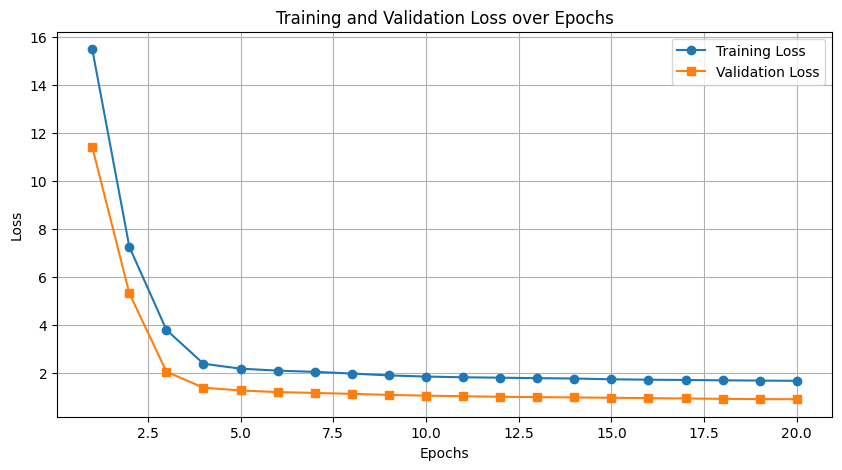

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label="Training Loss", marker="o")
plt.plot(range(1, num_epochs+1), val_losses, label="Validation Loss", marker="s")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss over Epochs")
plt.legend()
plt.grid(True)
plt.savefig('Loss_plot.png')
plt.show()


## Test loop

In [24]:
# Now that we done with training and validation we can check with the test dataset to see how good are the predictions
def test(model, test_loader, criterion):
    model.eval()  # Set the model to evaluation mode
    running_loss = 0.0
    total = 0
    with torch.no_grad():  # Disable gradient calculations for testing
        # Wrap the test_loader with tqdm for a progress bar
        for inputs, targets in tqdm(test_loader, desc="Testing", ncols=100):
            inputs = inputs.unsqueeze(-1)
            # Forward pass
            outputs = model(inputs)
            
            # Calculate loss
            loss = criterion(outputs, targets)
            running_loss += loss.item() * inputs.size(0)
            total += inputs.size(0)
    
    avg_loss = running_loss / total
    print(f'Test Loss: {avg_loss:.4f}')
    return avg_loss

test(model, test_loader, criterion)

Testing: 100%|████████████████████████████████████████████████████| 23/23 [00:00<00:00, 1160.32it/s]

Test Loss: 0.7405


0.7404663393922973

## Visualizing difference between real and predicted values

In [28]:
predictions = []
real_values = []

model.eval()  # Set model to evaluation mode

with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc="Predicting", unit="batch"):
        inputs = inputs.unsqueeze(-1)  # unsqueeze adds an additional dimension at the end (as I put -1)
        outputs = model(inputs).squeeze().tolist()  # Get predictions
        predictions.extend(outputs)  
        real_values.extend(labels.squeeze().tolist())  # Ensure labels are stored in the correct format


import numpy as np
predictions = np.array(predictions)
real_values = np.array(real_values)


Predicting: 100%|██████████| 23/23 [00:00<00:00, 1160.46batch/s]


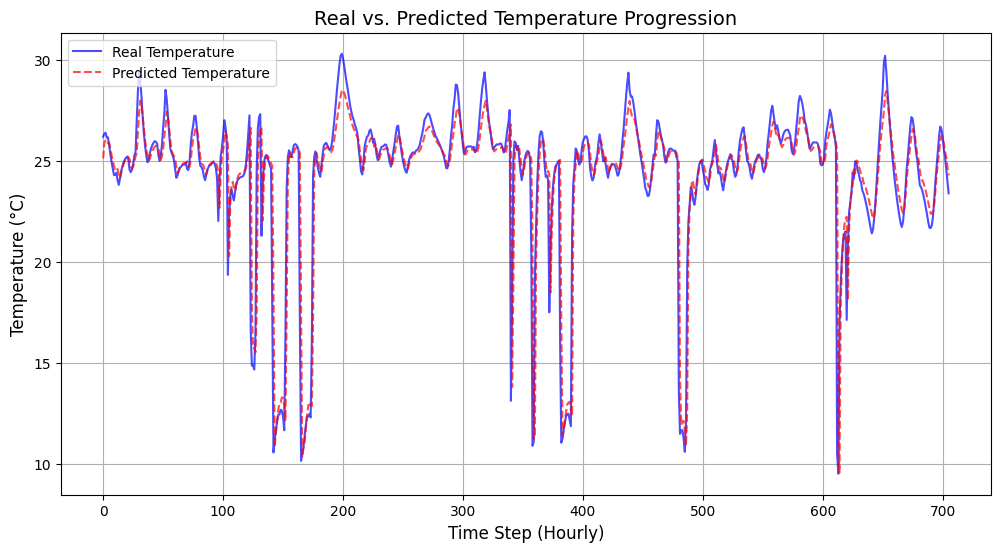

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(real_values, label="Real Temperature", color="blue", alpha=0.7)
plt.plot(predictions, label="Predicted Temperature", color="red", linestyle="dashed", alpha=0.7)
plt.title('Real vs. Predicted Temperature Progression', fontsize=14)
plt.xlabel('Time Step (Hourly)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend()
plt.grid(True)
plt.savefig("Real_vs_predicted.png")
plt.show()